In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
df = pd.read_csv("epi.csv", encoding = "latin-1")
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df2=df.dropna().drop_duplicates().drop(["title"],axis=1)
df2.head()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
x2 = df2.drop("cake", axis=1)
y2 = df2["cake"]

In [5]:
import pandas as pd
from sklearn import preprocessing

numeric = x2.select_dtypes(include=[np.number]).columns
min_max_scaler = preprocessing.MinMaxScaler()
x2[numeric] = min_max_scaler.fit_transform(x2[numeric])

In [6]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
select= SelectKBest(chi2,k=10)
X_new = select.fit_transform(x2,y2)

In [8]:
mask1 = select.get_support()
features = x2.columns[mask1]
features

Index(['almond', 'bake', 'birthday', 'chocolate', 'cream cheese', 'dessert',
       'egg', 'kidney friendly', 'mixer', 'pescatarian'],
      dtype='object')

In [6]:
split = round(len(df2)*0.25)

In [7]:
trainx = x2[:split]
trainy = y2[:split]
testx = x2[split:]
testy = y2[split:]

In [11]:
qbert = list(features)
trainx2 = x2[qbert][:split]
testx2 = x2[qbert][split:]

### 1a: Using the Epicurious dataset, use support vector machines to predict whether or not a recipe is tagged as cake. You may experiment with the features (i.e., use different combinations, use the principal components from last homework, etc.). Report your accuracy, sensitivity, specificity, etc.

In [12]:
from sklearn import svm

In [13]:
#Model 1: uses the 10 features selected in 5A via select K best
clf = svm.SVC()
clf.fit(trainx2, trainy)

SVC()

In [30]:
a = clf.predict(testx2)

In [31]:
from sklearn import metrics
dad = metrics.confusion_matrix(testy, a)
accuracy = (dad[0][0]+dad[1][1])/len(testy)
specificity = dad[0][0]/(dad[0][0]+dad[0][1])
sensitivity = dad[1][1]/(dad[1][1]+dad[1][0])
PPV = dad[1][1]/(dad[1][1]+dad[0][1])
NPV = dad[0][0]/(dad[0][0]+dad[1][0])
print("Using 10 predictive factors and SVD, we find our model produces an accuracy of ", accuracy, ", a specificitiy of ", specificity, ", a sensitivity of ", sensitivity, ", a Positive Predictive Value of ", PPV, " and a Negative Predictive Value of", NPV, ".")

Using 10 predictive factors and SVD, we find our model produces an accuracy of  0.9621561750046151 , a specificitiy of  0.9924992787768054 , a sensitivity of  0.2367816091954023 , a Positive Predictive Value of  0.569060773480663  and a Negative Predictive Value of 0.9688350699333521 .


In [36]:
#Model 2: uses the PCA features from 5A
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
dfx = x2.copy()
scaler = StandardScaler()
scaler.fit(dfx)
dfx = scaler.transform(dfx)
pcA = PCA()
pcA.fit(dfx)
df_x2 = pcA.transform(dfx)

In [37]:
pcs = pcA.components_
variances = pcA.explained_variance_ratio_
cumulative = np.cumsum(variances)
n = np.argmax(cumulative>=0.8)+1
print(n)

430


In [38]:
pca = PCA(n_components = n)
pca.fit(dfx)
df_final = pca.transform(dfx)

In [53]:
train_x = df_final[:split]
trainy = y2[:split]
test_x = df_final[split:]
testy = y2[split:]

In [56]:
clf = svm.SVC()
clf.fit(train_x, trainy)

SVC()

In [57]:
a = clf.predict(test_x)
from sklearn import metrics
dad = metrics.confusion_matrix(testy, a)
accuracy = (dad[0][0]+dad[1][1])/len(testy)
specificity = dad[0][0]/(dad[0][0]+dad[0][1])
sensitivity = dad[1][1]/(dad[1][1]+dad[1][0])
PPV = dad[1][1]/(dad[1][1]+dad[0][1])
NPV = dad[0][0]/(dad[0][0]+dad[1][0])
print("Using 10 predictive factors and SVD, we find our model produces an accuracy of ", accuracy, ", a specificitiy of ", specificity, ", a sensitivity of ", sensitivity, ", a Positive Predictive Value of ", PPV, " and a Negative Predictive Value of", NPV, ".")

Using 10 predictive factors and SVD, we find our model produces an accuracy of  0.9625253830533506 , a specificitiy of  0.9994230214443697 , a sensitivity of  0.08045977011494253 , a Positive Predictive Value of  0.8536585365853658  and a Negative Predictive Value of 0.9629389419067914 .


In [59]:
#Model 3: uses all features in dataframe (outside of cake):
trainx3 = x2[:split]
trainy3 = y2[:split]
testx3 = x2[split:]
testy3 = y2[split:]

In [61]:
clf = svm.SVC()
clf.fit(trainx3, trainy3)

SVC()

In [62]:
a = clf.predict(testx3)
from sklearn import metrics
dad = metrics.confusion_matrix(testy3, a)
accuracy = (dad[0][0]+dad[1][1])/len(testy)
specificity = dad[0][0]/(dad[0][0]+dad[0][1])
sensitivity = dad[1][1]/(dad[1][1]+dad[1][0])
PPV = dad[1][1]/(dad[1][1]+dad[0][1])
NPV = dad[0][0]/(dad[0][0]+dad[1][0])
print("Using 10 predictive factors and SVD, we find our model produces an accuracy of ", accuracy, ", a specificitiy of ", specificity, ", a sensitivity of ", sensitivity, ", a Positive Predictive Value of ", PPV, " and a Negative Predictive Value of", NPV, ".")

Using 10 predictive factors and SVD, we find our model produces an accuracy of  0.9651098393944988 , a specificitiy of  0.9990383690739494 , a sensitivity of  0.15402298850574714 , a Positive Predictive Value of  0.8701298701298701  and a Negative Predictive Value of 0.9657897183229525 .


### 1b: Plot the ROC curve for your support vector machine model. Add the ROC curve from your best model from Homework 5A to same plot. Find the areas under the curve for both models. Which one performs better?

In [52]:
clf = svm.SVC(C=0.5, probability=True)
clf.fit(trainx2, trainy)
a = clf.predict(testx2)
from sklearn import metrics
dad = metrics.confusion_matrix(testy, a)
accuracy = (dad[0][0]+dad[1][1])/len(testy)
specificity = dad[0][0]/(dad[0][0]+dad[0][1])
sensitivity = dad[1][1]/(dad[1][1]+dad[1][0])
PPV = dad[1][1]/(dad[1][1]+dad[0][1])
NPV = dad[0][0]/(dad[0][0]+dad[1][0])
print("Using 10 predictive factors and SVD, we find our model produces an accuracy of ", accuracy, ", a specificitiy of ", specificity, ", a sensitivity of ", sensitivity, ", a Positive Predictive Value of ", PPV, " and a Negative Predictive Value of", NPV, ".")

Using 10 predictive factors and SVD, we find our model produces an accuracy of  0.9618792689680635 , a specificitiy of  0.9963458024810078 , a sensitivity of  0.13793103448275862 , a Positive Predictive Value of  0.6122448979591837  and a Negative Predictive Value of 0.9650707898658718 .


In [67]:
g = np.arange(0.01,1.01,0.01)

In [65]:
def accuracy(actual,test):
    dad = metrics.confusion_matrix(actual, test)
    accuracy = (dad[0][0]+dad[1][1])/len(actual)
    return(accuracy)

In [69]:
X=[]
Y=[]
Z=[]

for i in g:
    clf = svm.SVC(C=i, probability=True)
    clf_1=clf.fit(trainx2, trainy)
    x = accuracy(testy,clf.predict(testx2))
    X.append(x)

In [83]:
Y=[]
for i in g:
    clf = svm.SVC(C=i, probability=True)
    clf_2=clf.fit(train_x,trainy)
    y = accuracy(testy,clf.predict(test_x))
    print(i,y)
    Y.append(y)

0.01 0.9598486247000184
0.02 0.9598486247000184
0.03 0.9598486247000184
0.04 0.9598486247000184
0.05 0.9598486247000184
0.060000000000000005 0.9598486247000184
0.06999999999999999 0.9598486247000184
0.08 0.9598486247000184
0.09 0.9598486247000184
0.09999999999999999 0.9598486247000184
0.11 0.9598486247000184
0.12 0.9598486247000184
0.13 0.9598486247000184
0.14 0.9598486247000184
0.15000000000000002 0.9598486247000184
0.16 0.9598486247000184
0.17 0.9598486247000184
0.18000000000000002 0.9598486247000184
0.19 0.9598486247000184
0.2 0.9598486247000184
0.21000000000000002 0.9598486247000184
0.22 0.9598486247000184
0.23 0.9598486247000184
0.24000000000000002 0.9598486247000184
0.25 0.9598486247000184
0.26 0.9598486247000184
0.27 0.9598486247000184
0.28 0.9598486247000184
0.29000000000000004 0.9598486247000184
0.3 0.9598486247000184
0.31 0.9598486247000184
0.32 0.9598486247000184
0.33 0.9598486247000184
0.34 0.9598486247000184
0.35000000000000003 0.9598486247000184
0.36000000000000004 0.9598

In [73]:
for i in g:
    print(i)
    clf = svm.SVC(C=i, probability=True)
    clf_3=clf.fit(trainx3,trainy3)
    z = accuracy(testy3,clf.predict(testx3))
    Z.append(z)

0.01
0.02
0.03
0.04
0.05
0.060000000000000005
0.06999999999999999
0.08
0.09
0.09999999999999999
0.11
0.12
0.13
0.14
0.15000000000000002
0.16
0.17
0.18000000000000002
0.19
0.2
0.21000000000000002
0.22
0.23
0.24000000000000002
0.25
0.26
0.27
0.28
0.29000000000000004
0.3
0.31
0.32
0.33
0.34
0.35000000000000003
0.36000000000000004
0.37
0.38
0.39
0.4
0.41000000000000003
0.42000000000000004
0.43
0.44
0.45
0.46
0.47000000000000003
0.48000000000000004
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.5700000000000001
0.5800000000000001
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.6900000000000001
0.7000000000000001
0.7100000000000001
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.8200000000000001
0.8300000000000001
0.8400000000000001
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.9400000000000001
0.9500000000000001
0.9600000000000001
0.97
0.98
0.99
1.0


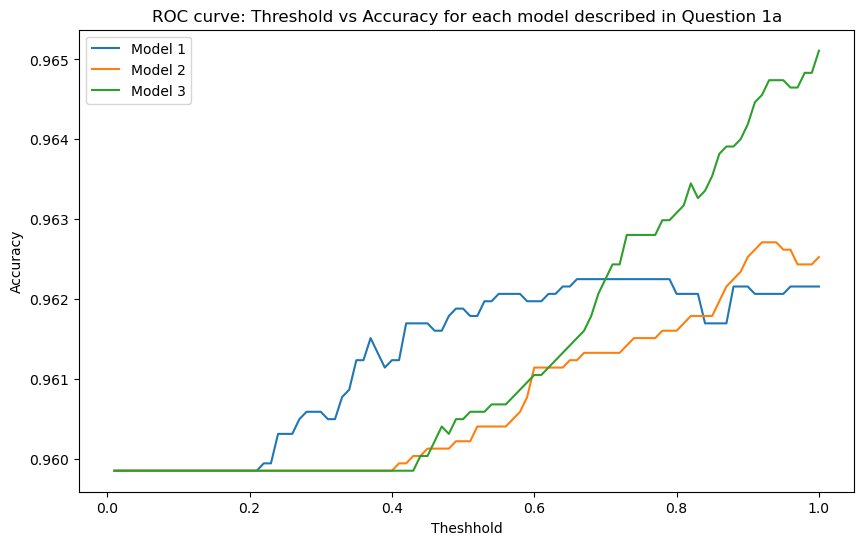

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(g,X, label = "Model 1")
plt.plot(g,Y, label = "Model 2")
plt.plot(g,Z, label = "Model 3")
plt.xlabel("Theshhold")
plt.ylabel("Accuracy")
plt.title("ROC curve: Threshold vs Accuracy for each model described in Question 1a")
plt.legend()
plt.show()

In [90]:
print("Area under ROC curve for model 1: ",np.mean(X))
print("Area under ROC curve for model 2: ",np.mean(Y))
print("Area under ROC curve for model 3: ",np.mean(Z))
#From this, we observe that by ROC, model 1 (with 10 best parameters) performs the best

Area under ROC curve for model 1:  0.9613116115931324
Area under ROC curve for model 2:  0.9607319549566181
Area under ROC curve for model 3:  0.9613014583717927


### 2a: Apply k-means clustering for a range of k to all of the Epicurious features. Most of the features are categorical and should already be coded as indicator variables (0’s and 1’s), but there are a few numeric variables corresponding to the nutrition facts for each recipe. Make a plot of the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for the residual within cluster variance as a function of k and choose the best k.

In [6]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn
from sklearn import preprocessing

In [7]:
scaler = preprocessing.StandardScaler().fit(x2.values)
X = scaler.transform(x2.values)
X

array([[-9.92098041e-01, -1.65681566e-02, -1.77492853e-02, ...,
        -3.72342006e-02, -2.88334940e-02,  7.08709746e+00],
       [ 4.80049631e-01, -1.66294092e-02, -2.11636639e-02, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01],
       [-1.06662598e-02, -1.72632401e-02, -2.45780425e-02, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01],
       ...,
       [ 4.80049631e-01, -1.62033044e-02, -1.74647537e-02, ...,
        -3.72342006e-02, -2.88334940e-02,  7.08709746e+00],
       [ 4.80049631e-01, -1.60222099e-02, -1.34813120e-02, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01],
       [ 4.80049631e-01, -1.62112939e-02, -5.51442864e-03, ...,
        -3.72342006e-02, -2.88334940e-02, -1.41101488e-01]])

In [26]:
def get_km(k, X):
    km = KMeans(n_clusters=k, random_state=37)
    km.fit(X)
    return km

def get_bic_aic(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X), gmm.aic(X)

def get_score(k, X, y):
    km = get_km(k, X)
    y_pred = km.predict(X)
    bic, aic = get_bic_aic(k, X)
    return k, bic, aic

In [48]:
k=[]
AIC=[]
BIC=[]

for i in range(1,11):
    g = get_score(i,X,y2)
    k.append(i)
    AIC.append(g[1])
    BIC.append(g[2])

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.wa

In [49]:
AIC

[25283827.69776693,
 26994376.47911439,
 -491989.2338359887,
 -20142811.69375652,
 3313571.936698111,
 -9394422.21562792,
 6978632.5045147315,
 -5514546.286648415,
 1571149.888585642,
 2677417.2104646713]

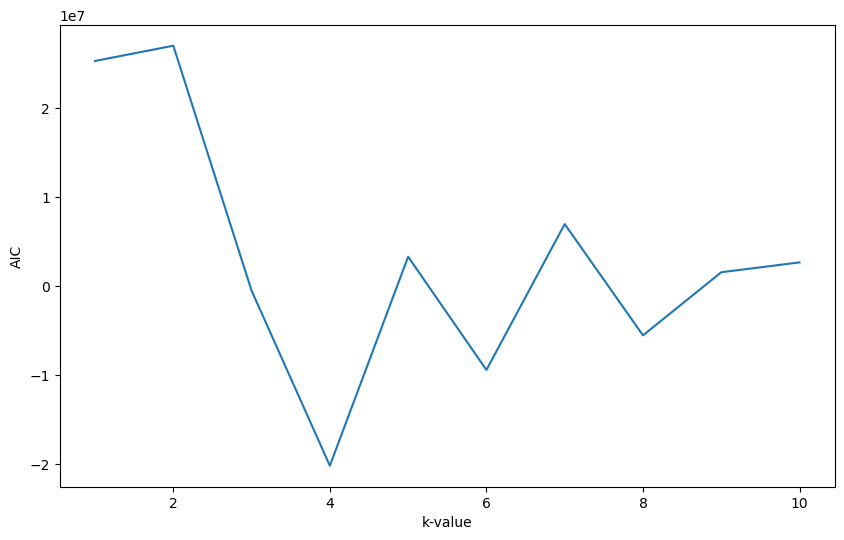

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k,AIC)
plt.xlabel("k-value")
plt.ylabel("AIC")
plt.show()

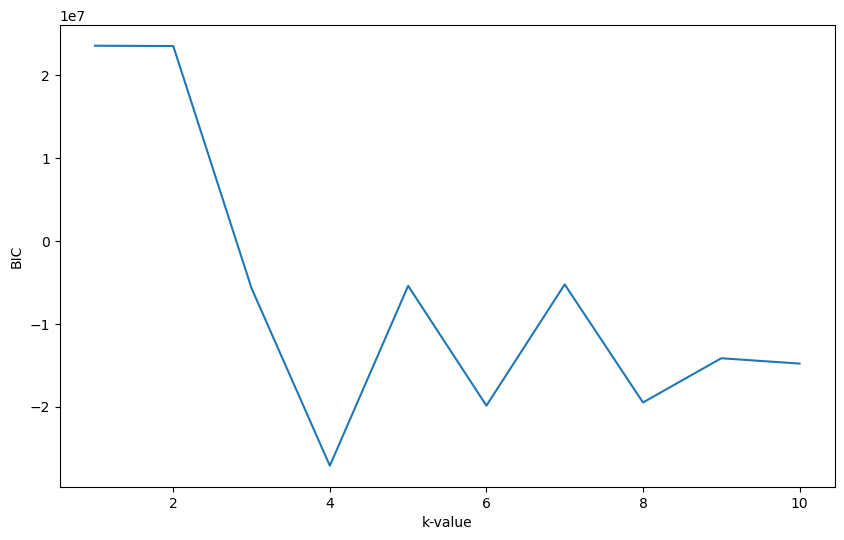

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k,BIC)
plt.xlabel("k-value")
plt.ylabel("BIC")
plt.show()

In [53]:
#For the AIC/BIC problem, we want to work with k that gives us the lowest AIC/BIC value
#We observe that AIC is minimized for k=4 and BIC is minimized for k=4.  Looking at the mean of these values, we will go with k=4.

### 2b: Using the k that you found in the previous step, produce a visualization that explains how some of the clusters differ using the following steps:
• So that you can visualize the clusters in two dimensions at a time, perform Principal Component Analysis (a.k.a., singular value decomposition). This should be very similar to your analysis from Homework 5A, Part 2.

• Create scatter plots of the first two principal components, PC1 and PC2. Label the axes with the fraction of the variance explained by PC1 and PC2.

• Color each point according to the cluster labels.

• Repeat the previous two steps for the following pairs of components: PC3 and PC4, PC5 and PC6, PC7 and PC8, and PC9 and PC10. You should not have to re-perform PCA on the features.

In [5]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [8]:
pca = PCA()
# fit PCA
pca.fit(X)
# PCA transformed data
data_pca = pca.transform(X)
pca.explained_variance_ratio_

array([1.10233423e-02, 9.16131498e-03, 7.43657003e-03, 5.68532394e-03,
       5.44653839e-03, 4.76015199e-03, 4.56346765e-03, 4.09759930e-03,
       3.95485229e-03, 3.75352644e-03, 3.74036404e-03, 3.66664909e-03,
       3.55647171e-03, 3.49883512e-03, 3.42755221e-03, 3.35945441e-03,
       3.29108883e-03, 3.22603124e-03, 3.19037310e-03, 3.13699578e-03,
       3.11126670e-03, 3.06805573e-03, 3.05158297e-03, 3.03466816e-03,
       3.02204655e-03, 3.00301933e-03, 2.92544382e-03, 2.89978288e-03,
       2.85216671e-03, 2.83448332e-03, 2.81265394e-03, 2.79979536e-03,
       2.77034921e-03, 2.75194138e-03, 2.73491018e-03, 2.72290777e-03,
       2.68486963e-03, 2.66467288e-03, 2.65414880e-03, 2.65281648e-03,
       2.63753522e-03, 2.61115107e-03, 2.59944401e-03, 2.57518159e-03,
       2.57416440e-03, 2.56005068e-03, 2.53515804e-03, 2.53059238e-03,
       2.51675448e-03, 2.51359563e-03, 2.49834982e-03, 2.49060569e-03,
       2.48495249e-03, 2.46528140e-03, 2.45837685e-03, 2.44497876e-03,
      

In [9]:
pca2 = PCA(svd_solver='full')
# fit PCA
pca2.fit(X)

# PCA transformed data
data_pca2 = pca2.transform(X)
print(data_pca2.shape)

(14446, 678)


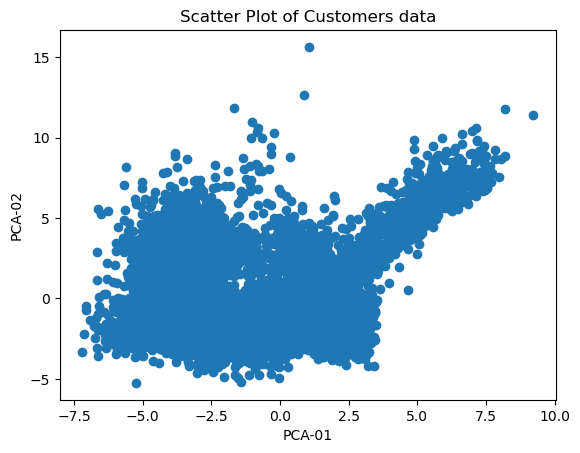

In [10]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(xs, ys)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

In [11]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)

In [12]:
pipeline = make_pipeline(scaler, pca2, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(X)
model_fit

/Users/maxsaint/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(svd_solver='full')),
                ('kmeans', KMeans(n_clusters=4, random_state=0))])

In [13]:
labels = model_fit.predict(X)

In [14]:
zed=[]
for i in labels:
    zed.append(i)

In [15]:
dig = pd.DataFrame({"x": data_pca2[:,0], "y": data_pca2[:,1], "label": zed})

In [16]:
dig

,x,y,label
0,1.847747,-1.547763,1
1,2.136999,0.926160,1
2,1.978836,-1.201552,1
3,0.727868,-0.723525,1
4,1.916771,-1.724430,1
...,...,...,...
14441,2.080599,0.842015,1
14442,-2.872678,-1.124012,2
14443,-1.193611,-1.408776,2
14444,2.214304,-1.155874,1


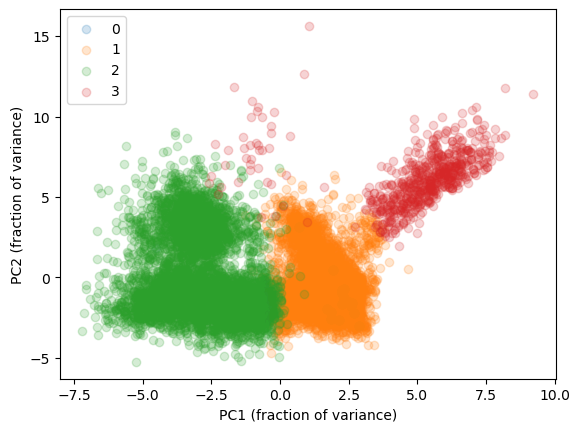

In [29]:
#PC1 vs PC2
dig1 = pd.DataFrame({"x": data_pca2[:,0], "y": data_pca2[:,1], "label": zed})
fig,ax = plt.subplots()
for k,d in dig.groupby('label'):
    ax.scatter(d['x'], d['y'], label=k,alpha=0.2)
plt.legend(loc=2)
plt.grid(False)
plt.xlabel("PC1 (fraction of variance)")
plt.ylabel("PC2 (fraction of variance)")
plt.show()

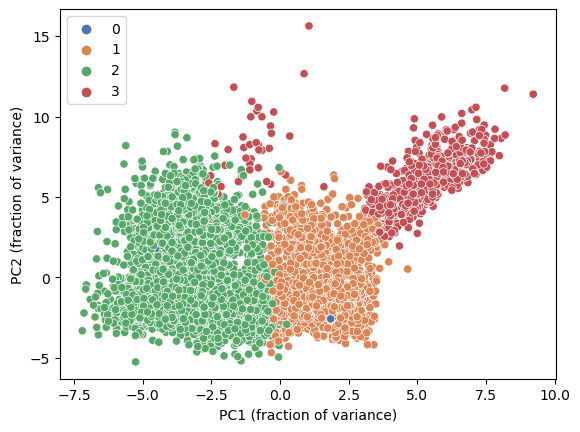

In [44]:
fig,ax = plt.subplots()
ax = sns.scatterplot(data=dig, hue='label', x='x', y='y',palette="deep")
ax.set(xlabel='PC1 (fraction of variance)', ylabel='PC2 (fraction of variance)')
plt.legend(loc=2)
plt.show()

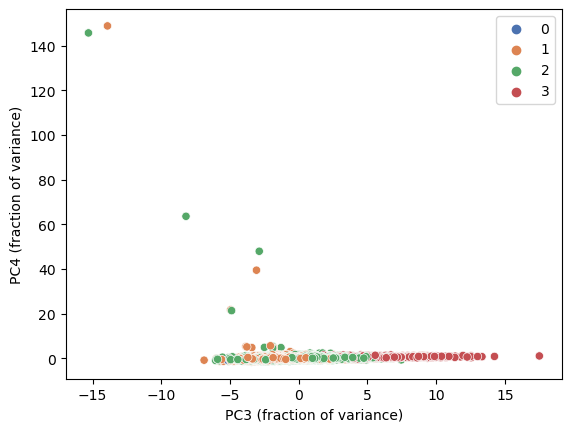

In [46]:
#PC3 vs PC4
dig2 = pd.DataFrame({"x": data_pca2[:,2], "y": data_pca2[:,3], "label": zed})
fig,ax = plt.subplots()
ax = sns.scatterplot(data=dig2, hue='label', x='x', y='y',palette="deep")
ax.set(xlabel='PC3 (fraction of variance)', ylabel='PC4 (fraction of variance)')
plt.legend(loc=1)
plt.show()

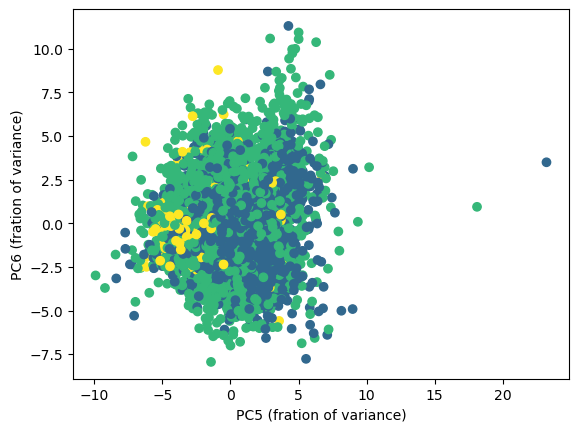

In [37]:
#PC5 vs PC6
xs = data_pca2[:,4]
ys = data_pca2[:,5]
#zs = train_X.iloc[:,2]
plt.scatter(xs, ys,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.xlabel("PC5 (fration of variance)")
plt.ylabel("PC6 (fration of variance)")
plt.show()

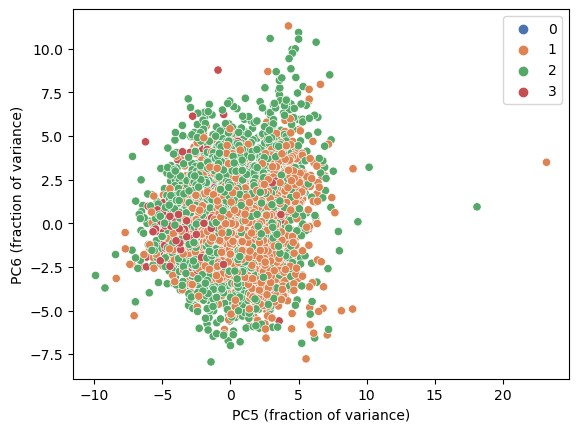

In [47]:
#PC5 vs PC6
dig3 = pd.DataFrame({"x": data_pca2[:,4], "y": data_pca2[:,5], "label": zed})
fig,ax = plt.subplots()
ax = sns.scatterplot(data=dig3, hue='label', x='x', y='y',palette="deep")
ax.set(xlabel='PC5 (fraction of variance)', ylabel='PC6 (fraction of variance)')
plt.legend(loc=1)
plt.show()

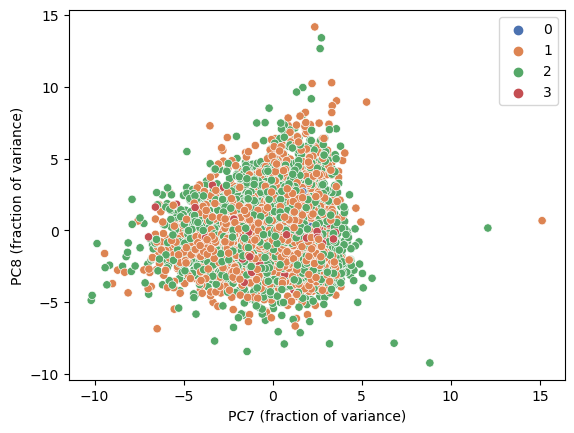

In [49]:
#PC7 vs PC8
dig4 = pd.DataFrame({"x": data_pca2[:,6], "y": data_pca2[:,7], "label": zed})
fig,ax = plt.subplots()
ax = sns.scatterplot(data=dig4, hue='label', x='x', y='y',palette="deep")
ax.set(xlabel='PC7 (fraction of variance)', ylabel='PC8 (fraction of variance)')
plt.legend(loc=1)
plt.show()

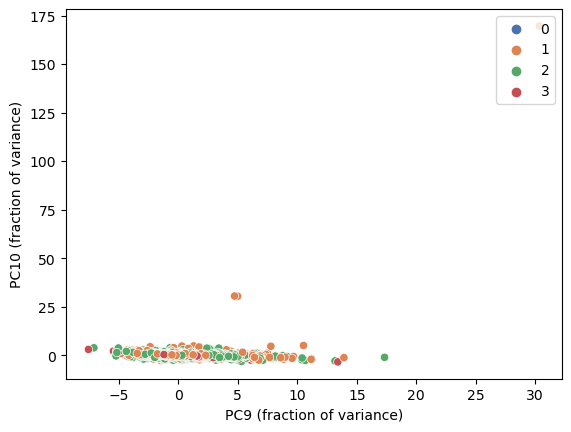

In [50]:
#PC9 vs PC10
dig5 = pd.DataFrame({"x": data_pca2[:,8], "y": data_pca2[:,9], "label": zed})
fig,ax = plt.subplots()
ax = sns.scatterplot(data=dig5, hue='label', x='x', y='y',palette="deep")
ax.set(xlabel='PC9 (fraction of variance)', ylabel='PC10 (fraction of variance)')
plt.legend(loc=1)
plt.show()

### 2c: Try to come up with a "name" or description for at least a few of the clusters–are they easily interpretable?

In [74]:
print("In charts 1 and 2, we observe that the values labeled as category 3 have a higher proportion of PC1 and PC3 as a fracction of variance compared to PC2 vs PC4, by contrast to other categories.  This means these datapoints are highly affected by the ratings and protein scores for a recipe compared to calories or fat.  Looking through titles at these locations, this category appears to tie to drinks/beverages, such as eggnog and champagne.")
print("In chart 1, we observe that values labeled as category 2 have a higher proportion of PC2 vs PC1, indicating their variance is more highly affected by calories than by ratings. Titles in this category implies this category correlates to fruit/vegetable heavy dishes, such as salads, tofu and beans.")
print("In chart 1 (PC1 vs PC2), we observe that values labeled as category 1 have a higher PC1 variance vs PC2 variance than category 2, but less than category 1.  Looking at the items in this cluster, this category appears to be composed primarily of savory dishes such as chicken, ham and pizza.")

In charts 1 and 2, we observe that the values labeled as category 3 have a higher proportion of PC1 and PC3 as a fracction of variance compared to PC2 vs PC4, by contrast to other categories.  This means these datapoints are highly affected by the ratings and protein scores for a recipe compared to calories or fat.  Looking through titles at these locations, this category appears to tie to drinks/beverages, such as eggnog and champagne.
In chart 1, we observe that values labeled as category 2 have a higher proportion of PC2 vs PC1, indicating their variance is more highly affected by calories than by ratings. Titles in this category implies this category correlates to fruit/vegetable heavy dishes, such as salads, tofu and beans.
In chart 1 (PC1 vs PC2), we observe that values labeled as category 1 have a higher PC1 variance vs PC2 variance than category 2, but less than category 1.  Looking at the items in this cluster, this category appears to be composed primarily of savory dishes su

In [54]:
df2

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df3=df.dropna().drop_duplicates()
df3.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
for i in range(len(zed)):
    if zed[i]==3:
        print(i,df4["title"][i])

89 Tropical Rum Punch 
92 Laddie's Sub-Bourbon 
112 Rumbrosia 
151 Sangria IV 
167 Eggnog 
172 D.i.y. Drinks Bar 
235 Spiced Christmas Coffee with Brandied Whipped Cream 
262 Kamikaze 
322 Conference 
377 CafÃ© Iguana Margarita 
408 Claret Cobbler 
417 Bee's Knees 
433 Moscow Mule 
434 Grog 
453 Orange Gin Fizz 
465 Affinity 
527 Concord Grape and Champagne Cocktails 
585 Tequila Tropical Punch 
595 Margarita I 
606 Moulin Rouge 
616 Strawberry Margarita Fizz 
648 Spiced Wine with Dried Fruit 
653 The Sicilian Slush 
726 Passion Fruit Mimosas 
740 Peach and Mango Daiquiri 
747 French 75 
754 Mixed-Berry Daiquiri 
873 Champagne Black Raspberry Punch 
904 Deep Sea 
943 Spiced Cherry Cider with Kirsch Cream 
964 Culross 
982 Pineapple Bowl 
990 Frozen Cranberry, Cherry and Orange Cocktail 
991 Preakness 
995 Tequila Mojito 
1028 Brandy Bishop 
1038 Hot Buttered Bourbon and Cider 
1041 KCB 
1049 Raspberry Champagne Cocktail 
1087 French 75 
1113 Fruit Juice and Vodka Punch 
1126 Mint Julep

In [70]:
df4 = df3["title"].reset_index()
df4["title"][167]

'Eggnog '

In [72]:
for i in range(len(zed)):
    if zed[i]==2:
        print(i,df4["title"][i])

6 Ham Persillade with Mustard Potato Salad and Mashed Peas 
8 Banana-Chocolate Chip Cake With Peanut Butter Frosting 
12 Sweet Buttermilk Spoon Breads 
15 Tuna, Asparagus, and New Potato Salad with Chive Vinaigrette and Fried Capers 
19 Cucumber-Basil Egg Salad 
21 Green Bean, Red Onion, and Roast Potato Salad with Rosemary Vinaigrette 
22 Apricot-Cherry Shortcakes 
23 Roasted Sweet-Potato Spears with Bacon Vinaigrette 
26 Sauteed Broccoli Rabe 
28 Better-Than-Pita Grill Bread 
29 Coconut-Key Lime Sheet Cake 
32 Spicy Black Beans and Rice 
34 Citrus Salad with Mint Sugar 
35 Mexican Chile and Mushroom Soup 
40 Pumpkin Muffins 
44 Romaine, Grilled Avocado, and Smoky Corn Salad with Chipotle-Caesar Dressing 
45 Southwest Corn Bread Stuffing with Corn and Green Chilies 
47 Mixed Berry Pavlovas 
48 Scarborough Fair Tofu Burger 
50 White Chocolate Tartlets with Strawberries and Bananas 
51 Tomato-Infused Bulgur Pilaf with Fresh Basil 
52 Roasted Butternut Squash, Rosemary, and Garlic Lasagn

In [73]:
for i in range(len(zed)):
    if zed[i]==1:
        print(i,df4["title"][i])

0 Lentil, Apple, and Turkey Wrap 
1 Boudin Blanc Terrine with Red Onion Confit 
2 Potato and Fennel Soup Hodge 
3 Spinach Noodle Casserole 
4 The Best Blts 
5 Korean Marinated Beef 
7 Yams Braised with Cream, Rosemary and Nutmeg 
9 Beef Tenderloin with Garlic and Brandy 
10 Peach Mustard 
11 Raw Cream of Spinach Soup 
13 Crisp Braised Pork Shoulder 
14 Mozzarella-Topped Peppers with Tomatoes and Garlic 
16 Asian Pear and Watercress Salad with Sesame Dressing 
17 Sea Salt-Roasted Pecans 
18 Garlic Baguette Crumbs 
20 Dried Pear Crisps 
24 Deviled Ham 
25 Aztec Chicken 
27 Grouper with Tomato and Basil 
30 Baked Halibut with Orzo, Spinach, and Cherry Tomatoes 
31 Pickled Red Onions 
33 Mexican Lime Soup 
36 Peanut Butter-Banana Muffins 
37 Pancetta Roast Chicken with Walnut Stuffing 
38 1977 Coconut Angel Food Cake 
39 Veal Burgers Stuffed with Mozzarella Cheese 
41 Orange Balsamic Glaze 
42 Roasted Eggplant and Olive Spread with Pita Bread Chips 
43 Pecan Blue Cheese Crackers 
46 Colin 